# **Data Exploration**

## Objectives

* The purpose of this notebook is to explore (at high level) the car price dataset.

## Inputs

* car_prices.csv

## Outputs

1. Insights for data cleaning
2. Set of analysis steps
3. Set of hupothesis/objectivs




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path


In [3]:
df = pd.read_csv(Path.cwd().parent / 'data/raw/car_prices.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
print(df['car_ID'].nunique(), df.shape[0])

205 205


In [10]:
print(df['CarName'].nunique(), df.shape[0])

147 205


In [11]:
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [12]:
df.query('CarName == "toyota corona"').head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
151,152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
160,161,0,toyota corona,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,38,47,7738.0
164,165,1,toyota corona,gas,std,two,hatchback,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8238.0
175,176,-1,toyota corona,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988.0


In [22]:
for categorical in ['symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem']:
       print(df[categorical].value_counts())
       print(10*'---')

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
------------------------------
CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
------------------------------
fueltype
gas       185
diesel     20
Name: count, dtype: int64
------------------------------
aspiration
std      168
turbo     37
Name: count, dtype: int64
------------------------------
doornumber
four    115
two      90
Name: count, dtype: int64
------------------------------
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
------------------------------
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
----------

In [24]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<ins>**Insights**</ins>:

1. No duplicates or nans
2. drop: car_id
3. CarName has several repeating values, but their are not absolute duplicates: no of doors, fueltype etc. differs
4. Convert the following to type category: 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'
5. Erroneous values:
    - CarName, naming convention violations (convert to the right hand version):
        - 'audi 100 ls' = 'audi 100ls'
        -  'vw dasher' = 'volkswagen dasher'
        -  'vw rabbit' = 'volkswagen rabbit'
        - 'mazda glc custom l' = 'mazda glc custom'
    - CarName, typos:
        - 'maxda rx3', correct is 'mazda rx3'
        - 'maxda glc deluxe', correct is 'mazda glc deluxe'  
        - 'porcshce panamera', is 'porsche panamera'
        - 'toyouta tercel', is 'toyota tercel'
        - 'vokswagen rabbit', is 'volkswagen rabbit'
    - drivewheel, naming (convert to right):
        - 4wd = fwd
    - enginetype:
        - don't know what 'l' means, probs typo
    - fuelsystem, naming convention (convert to right):
        - 'mfi' = 'mpfi'
6. Imbalanced groups (would be bad for ML):
    - Imbalance: 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'
    - Essentially monocategory (recommend dropping): 'fueltype', 'enginelocation'
7. No obvious issues with the numerical features, i.e. no obvious negative or exceedingly small/large numbers

<ins>**Project Steps**</ins>
1. Preliminary data exploration (done by Thursday)
2. Data cleaning:
    - variable type setting
    - deal with erroneous values (see above)
    - drop certain features (car_id and maybe some with imbalanced groups)
3. EDA:
    - check continuous feature distributions (this would help you decide how to approach Outlier Elimination and which statistical tests to use, i.e. parametric or non-p.) - use HISTOGRAM/KDE
    - check correlation of cont. features to each other and to target - use CORRELATION MATRIX
    - check relationship between categorical features and target variable - use SCATTERPLOT/HISTOGRAM/PLOT with categorical feature as HUE
4. Feature engineering
    - deal with Outliers
    - consider binnisation
    - consider standardisation (more important for ML)
5. Prediction
    - create multiple regression model
    - embed model into Streamlit dash


<ins>**Questions and Hypotheses**</ins>
1. Which features are most relevant from price prediction?
2. Can we create a prototype predictor engine, in which the most important features (discovered above) can be inputed and which would return a price (or price range)?

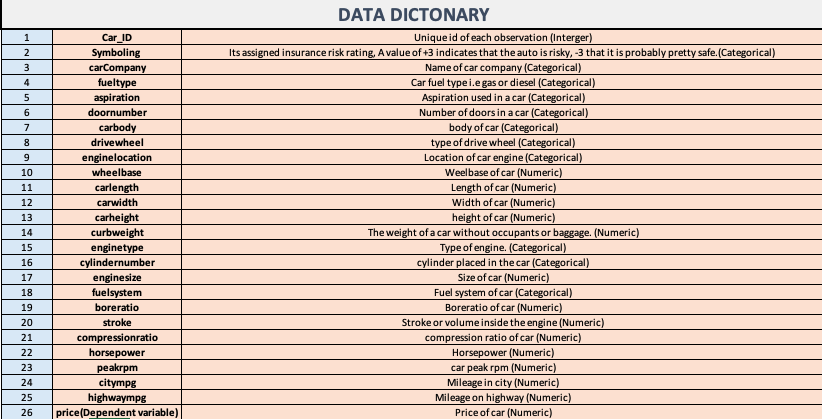

x